In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 109394
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
982,5fbdd271c21ba5394e93fdf2,2020-11-25 04:41:37.999,2020-11-25 03:41:37.977,NQZ0,SELL,3.0,12140.750000,[0000e1a7.5fbda433.01.01],318,2103638251,STOP-LOSS,6.30,3477.400000
983,5fbdd272c21ba5394e93fdf3,2020-11-25 04:41:38.033,2020-11-25 03:41:38.030,MNQZ0,SELL,9.0,12131.666667,"[0000e1a7.5fbda434.01.01, 0000e1a7.5fbda435.01...",319,2103638252,STOP-LOSS,4.23,875.540000
984,5fbe2364c21ba5394e93ff04,2020-11-25 10:27:00.080,2020-11-25 09:27:00.066,YM DEC 20,SELL,2.0,29950.000000,[0000e1a7.5fbdbe8c.01.01],285,794617904,STOP-LOSS,4.20,831.600000
985,5fbe376fc21ba5394e93ff4d,2020-11-25 11:52:31.695,2020-11-25 10:52:31.690,MESZ0,SELL,8.0,3625.000000,[0000e1a7.5fbdc548.01.01],209,1668533173,STOP-LOSS,3.76,1192.480000
986,5fbebfa1c21ba5394e94011e,2020-11-25 21:33:37.965,2020-11-25 20:33:37.872,NQZ0,BUY,3.0,12172.583333,"[0000e1a7.5fbe3aaf.01.01, 0000e1a7.5fbe3ab1.01...",306,950145931,ENTRY,6.30,0.000000
987,5fbebfaac21ba5394e94011f,2020-11-25 21:33:46.177,2020-11-25 20:33:46.158,MNQZ0,BUY,9.0,12172.638889,"[0000e1a7.5fbe3aae.01.01, 0000e1a7.5fbe3ab2.01...",307,950145934,ENTRY,4.23,0.000000
988,5fbec378c21ba5394e940130,2020-11-25 21:50:00.680,2020-11-25 20:50:00.676,NQZ0,SELL,3.0,12144.750000,[0000e1a7.5fbe3d7c.01.01],308,950145935,STOP-LOSS,6.30,-1682.600000
989,5fbec378c21ba5394e940131,2020-11-25 21:50:00.681,2020-11-25 20:50:00.676,MNQZ0,SELL,9.0,12134.333333,"[0000e1a7.5fbe3d7b.01.01, 0000e1a7.5fbe3d7d.01...",309,950145936,STOP-LOSS,4.23,-697.960001
990,5fbf143ec21ba5394e940242,2020-11-26 03:34:38.872,2020-11-26 02:34:38.770,NQZ0,BUY,3.0,12210.583333,"[0000e1a7.5fbee877.01.01, 0000e1a7.5fbee87a.01...",107,21946488,ENTRY,6.30,0.000000
991,5fbf144cc21ba5394e940243,2020-11-26 03:34:52.907,2020-11-26 02:34:52.768,MNQZ0,BUY,9.0,12210.000000,"[0000e1a7.5fbee878.01.01, 0000e1a7.5fbee879.01...",108,21946491,ENTRY,4.23,0.000000


In [3]:
df[df.reason.str.startswith('MANUAL')]

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
372,5f48024d0b06e6e56accaabb,2020-08-27 20:58:21.765,2020-08-27 18:58:21.760,NQU0,SELL,1.0,11961.75,[0000e1a7.5f47e774.01.01],-3,2141716104,MANUAL TRADE,2.1,0.0
373,5f48027e0b06e6e56accaabc,2020-08-27 20:59:10.623,2020-08-27 18:59:10.619,NQU0,BUY,1.0,11961.00,[0000e1a7.5f47e791.01.01],-4,2141716114,MANUAL TRADE,2.1,10.8
404,5f525a98f2a5ab6f74f19b3e,2020-09-04 17:17:44.300,2020-09-04 15:17:44.298,NQU0,SELL,1.0,11320.75,[0000e1a7.5f526f0b.01.01],-4,1940011984,MANUAL TRADE,2.1,0.0
432,5f7d98e9140b04161c23105c,2020-10-07 12:31:05.067,2020-10-07 10:31:05.065,NQZ0,SELL,1.0,11319.00,[0000e1a7.5f7d1bd9.01.01],-4,533904426,MANUAL TRADE,2.1,-169.2
970,5fbd0c57c21ba5394e93fb44,2020-11-24 14:36:23.848,2020-11-24 13:36:23.761,NQZ0,SELL,1.0,11948.00,[0000e1a7.5fbc8148.01.01],-4,2103638202,MANUAL TRADE,2.1,-44.2
971,5fbd0dfac21ba5394e93fb4b,2020-11-24 14:43:22.295,2020-11-24 13:43:22.294,NQZ0,SELL,1.0,11950.25,[0000e1a7.5fbc8227.01.01],-5,2103638208,MANUAL TRADE,2.1,-9.2
972,5fbd10a6c21ba5394e93fb52,2020-11-24 14:54:46.061,2020-11-24 13:54:45.970,NQZ0,SELL,2.0,11954.25,[0000e1a7.5fbc837d.01.01],-6,2103638214,MANUAL TRADE,4.2,-78.4
973,5fbd173fc21ba5394e93fb69,2020-11-24 15:22:55.695,2020-11-24 14:22:55.692,NQZ0,SELL,1.0,11956.00,[0000e1a7.5fbc8899.01.01],-7,2103638227,MANUAL TRADE,2.1,-24.2


In [4]:
df[df.realizedPNL>0].realizedPNL.count()

182

In [5]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [6]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [7]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [8]:
df.groupby('contract').realizedPNL.sum()

contract
ES     4103.800000
GC     6530.540001
NQ    15665.280011
YM     9594.079999
Name: realizedPNL, dtype: float64

In [9]:
df.realizedPNL.sum()

35893.70001099999

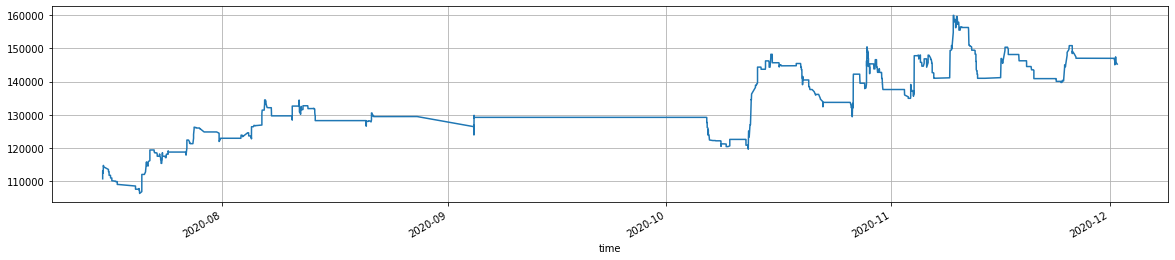

In [10]:
df.cash.plot(figsize=(20,4), grid=True);

In [11]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [12]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     97
 GC    198
 NQ    588
 YM    129
 Name: action, dtype: int64,
 1012)

In [13]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    0.960396
 GC    1.960396
 NQ    5.821782
 YM    1.277228
 Name: action, dtype: float64,
 10.01980198019802)

In [14]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     259.63
GC     529.89
NQ    1702.39
YM     357.40
Name: commission, dtype: float64

In [15]:
df.commission.sum()

2849.3100000000004

In [16]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
YM,0.38,131.57,1403.85,-644.20,2.18,134.06,70.3
NQ,0.37,34.16,1057.24,-566.35,1.87,34.38,329.3
ES,0.34,243.23,2033.86,-680.96,2.99,242.08,40.0
GC,0.34,91.40,1338.73,-561.97,2.38,84.27,82.7
total,0.36,77.57,1241.75,-586.63,2.12,71.59,522.3


In [17]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [18]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,0.020856,0.148626,0.293493,0.446691
GC,0.020856,1.000000,-0.070598,0.016752,0.229468
NQ,0.148626,-0.070598,1.000000,0.311478,0.846968
YM,0.293493,0.016752,0.311478,1.000000,0.639025
total,0.446691,0.229468,0.846968,0.639025,1.000000


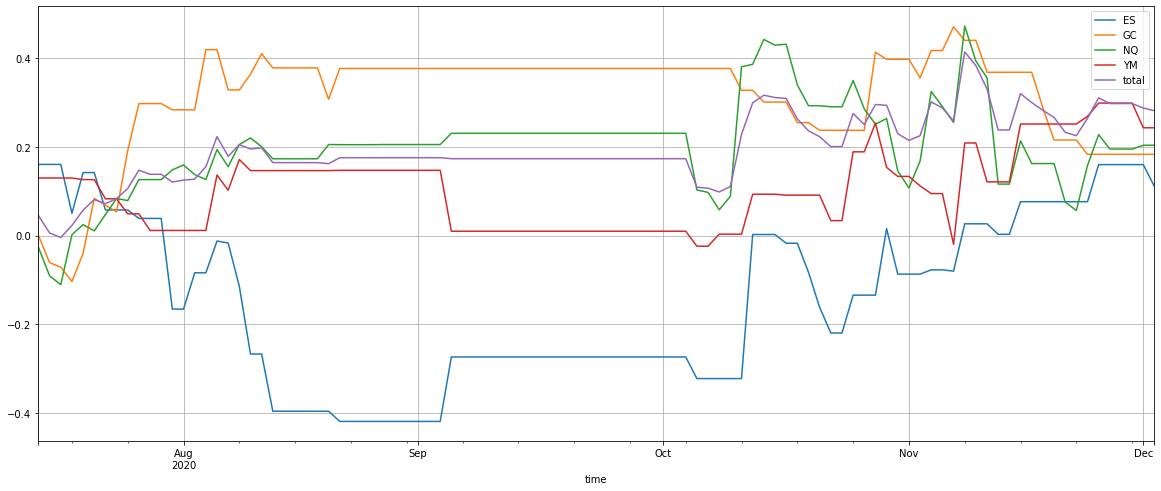

In [19]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

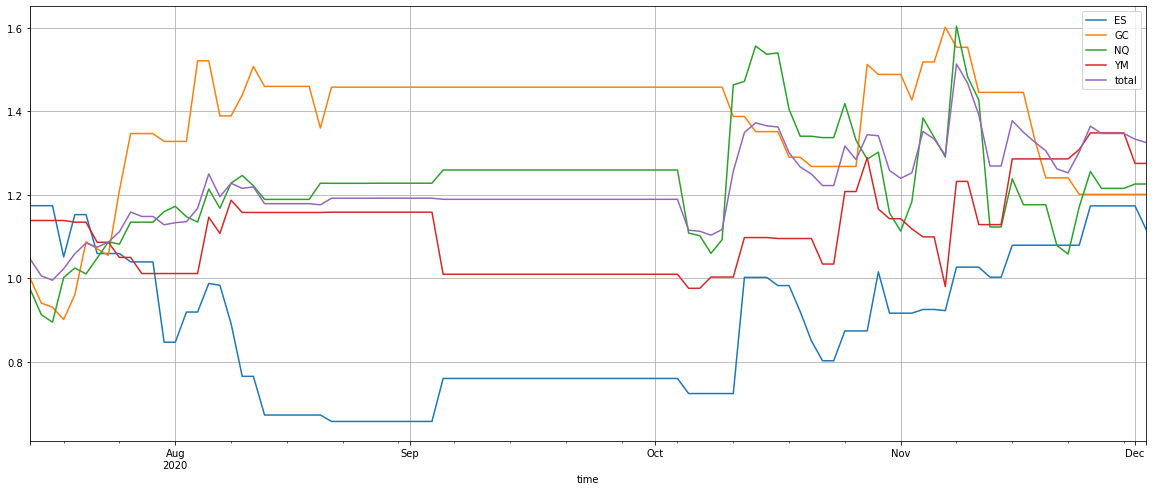

In [20]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [21]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,0.317072,0.579261,0.661885,0.833664,1.018162
Cumulative returns,0.116706,0.200989,0.225788,0.275078,0.325026
Annual volatility,1.013403,0.659718,0.990453,0.758652,0.550558
Sharpe ratio,0.738890,1.003446,0.975532,1.153736,1.539994
Calmar ratio,0.720767,2.317619,1.945510,3.484238,5.913922
Stability,0.078314,0.041719,0.198144,0.153812,0.633711
Max drawdown,-0.439909,-0.249938,-0.340212,-0.239267,-0.172164
Omega ratio,1.248645,1.330021,1.280462,1.441847,1.424074
Sortino ratio,1.346792,2.013327,1.775145,2.289066,3.001149
Skew,2.162465,1.995478,1.817063,2.130939,1.616451


In [22]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-07-31,-15.29,32.77,15.97,1.15,12.82
2020-08-31,-22.38,9.78,5.87,14.52,5.64
2020-09-30,15.65,0.00,2.57,-12.83,-0.22
2020-10-31,20.54,2.09,-8.16,13.16,5.81
2020-11-30,28.02,-19.29,5.08,17.98,7.03
2020-12-31,-4.83,0.00,0.86,-5.42,-1.61


In [23]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES       12.0
GC       20.0
NQ       23.0
YM       28.0
total    33.0
dtype: float64

In [24]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-11-04 03:14:38.840,NQ,SELL,11651.500000,11506.6
2020-11-09 01:36:53.379,NQ,SELL,12311.000000,8236.6
2020-11-16 01:46:56.858,NQ,SELL,12030.000000,5747.4
2020-07-20 22:44:06.883,NQ,SELL,10934.000000,5180.8
2020-10-12 08:41:25.532,NQ,SELL,11849.250000,5112.4
...,...,...,...,...
2020-10-28 20:12:43.602,NQ,BUY,11168.583333,-2327.6
2020-07-31 13:39:29.153,ES,SELL,3245.250000,-2408.4
2020-11-20 14:00:34.667,NQ,SELL,11976.416667,-2492.6


In [25]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-11-09,0.112801,-0.030102,0.242791,0.256893,0.168667
2020-10-12,0.000000,-0.048118,0.339078,0.000000,0.124805
2020-11-16,0.076374,0.000000,0.102596,0.139371,0.085428
2020-11-04,0.009712,0.063649,0.169632,-0.017112,0.079110
2020-10-26,0.089103,0.000000,0.061112,0.167803,0.077534
...,...,...,...,...,...
2020-10-19,0.000000,-0.045312,-0.087685,0.000000,-0.045269
2020-11-11,0.000000,-0.069488,-0.037141,-0.083980,-0.051486
2020-10-30,-0.097425,0.000000,-0.111733,-0.020080,-0.061892
